In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pos = np.random.rand(10,2)
pos

array([[0.2253504 , 0.9456236 ],
       [0.27673068, 0.95718718],
       [0.67994543, 0.41011467],
       [0.7109167 , 0.0836529 ],
       [0.21153148, 0.53055481],
       [0.39185314, 0.82650342],
       [0.4281087 , 0.49560959],
       [0.81615863, 0.94011685],
       [0.08019237, 0.43649369],
       [0.66897697, 0.2167063 ]])

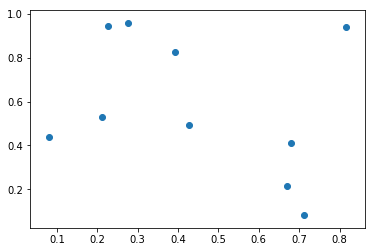

In [3]:
plt.scatter(pos[:,0],pos[:,1])

In [4]:
# import math
# distance = {}
# for i,posi in enumerate(pos):
#     for j,posj in enumerate(pos):
#         if j>i:
#             key = (i,j)
#             distance[key] = math.sqrt(sum( (posi-posj) ** 2 ))
#             print('{} : {}'.format(key,distance[key]))

In [5]:
# plt.plot(pos[:,0], pos[:,1],'bo',pos[:,0], pos[:,1],'r--')

In [6]:
def dot_swap(pre_pos,index1,index2):
    new_pos = pre_pos.copy()
    if isinstance(pre_pos , np.ndarray):
        tmp = new_pos[index1].copy()
        new_pos[index1] = new_pos[index2].copy()
        new_pos[index2] = tmp
    return new_pos

# pos2 = dot_swap(pos,0,1)
# print(pos,'\n')
# print(pos2)

In [7]:
import math
def calculateTotalDistance(pos):
    totalDistance = 0
    for i in range(len(pos)):
        if i < len(pos)-1:
            totalDistance += math.sqrt(sum( (pos[i]-pos[i+1]) ** 2 ))
    return totalDistance

# calculateTotalDistance(pos)

4.338286972218505
4.241425191127164
4.103429628299885
3.4388009002292184
3.1166978380526698
3.0457378371201362
2.944082698904578
2.772035645770664
2.7551826127135945
2.6747239849159254
2.5663699344435984
2.4321614837728327


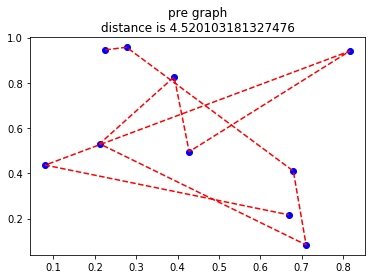

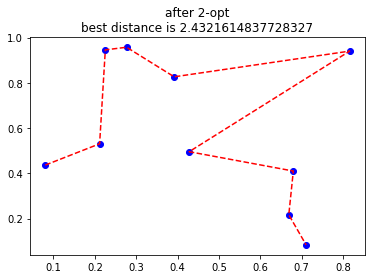

In [8]:
best_distance = calculateTotalDistance(pos)
best_pos = pos.copy()

plt.figure(0)
plt.title('pre graph\ndistance is {}'.format(best_distance))
plt.plot(pos[:,0], pos[:,1],'bo',pos[:,0],pos[:,1],'r--')

while True:
    try:
        for i in enumerate(best_pos):
            for j in enumerate(best_pos):
                if j[0]>i[0]:
                    new_pos = dot_swap(best_pos,i[0],j[0])
                    new_distance = calculateTotalDistance(new_pos)
                    if new_distance < best_distance:
                        best_distance = new_distance
                        best_pos = new_pos.copy()
                        print(best_distance)
                        raise Exception
    except Exception:
        continue
    break
    
plt.figure(1)
plt.title('after 2-opt\nbest distance is {}'.format(best_distance))
plt.plot(pos[:,0], pos[:,1],'bo',best_pos[:,0],best_pos[:,1],'r--')